<a href="https://colab.research.google.com/github/Pellizzari/Tarea2-INF393-II-2019/blob/master/Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 M√°quinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selecci√≥n de hƒ±ÃÅper-par√°metros estructurales en SVM, Arboles de Decisi√≥n, k-NN y Redes Neuronales.
* M√©todos de *kernel*.
* Extracci√≥n de caracter√≠sticas.
* M√∫ltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentaci√≥n y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentaci√≥n de 20 minutos. Presentador ser√° elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusi√≥n y entrega: 8 de Noviembre.
* Formato de entrega: envƒ±ÃÅo de link Github al correo electr√≥nico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalaci√≥n

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Adem√°s de √©stas se necesitar√° instalar **keras**, una librerƒ±ÃÅa en python para prototipado r√°pido de modelos basados en redes neuronales, muy similar en espƒ±ÃÅritu a *sklearn*. La librerƒ±ÃÅa puede usar *TensorFlow* o *Theano* como backend, siendo √©stas las librerƒ±ÃÅas m√°s populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines pr√°cticos. Para detalles sobre la instalaci√≥n puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>

## 1. Sentiment Analysis en Texto

El an√°lisis de emociones o sentimientos se refiere al proceso de extraer informaci√≥n acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
t√≥pico o contexto de comunicaci√≥n. Uno de los casos m√°s estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluaci√≥n escrita (*review*), en que una persona
manifiesta una opini√≥n, como *positiva*, *negativa* o *neutral*. Esto tambi√©n ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el car√°cter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas asƒ±ÃÅ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponder√° a una opini√≥n sobre una pel√≠cula, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente c√≥digo en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Mounted at /content/drive


In [2]:
cd drive/My Drive/Tarea 2

/content/drive/My Drive/Tarea 2


In [0]:
import pandas as pd

ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser √∫til para comprender el problema trabajado.


In [4]:

print("Descripcion datos de training:\n",df_train["Text"].str.len().describe())
print("Descripcion datos de test:\n",df_test["Text"].str.len().describe())
print("Forma de las labels Train:",labels_train.shape)
print("Forma de las labels Test:",labels_test.shape)




Descripcion datos de training:
 count    3554.000000
mean      114.707091
std        51.523887
min         7.000000
25%        76.000000
50%       111.000000
75%       150.750000
max       267.000000
Name: Text, dtype: float64
Descripcion datos de test:
 count    3554.000000
mean      116.467923
std        51.504231
min         9.000000
25%        78.000000
50%       114.000000
75%       151.000000
max       268.000000
Name: Text, dtype: float64
Forma de las labels Train: (3554,)
Forma de las labels Test: (3554,)


Basicamente cada uno de los datos trabajados para training son vectores de 3554 datos, siendo text[n] asociado al label[n] correspondiente. Para test ocurre lo mismo. Ambos conjuntos poseen estadisticas similares.

> b) Construya un conjunto de validaci√≥n desde el conjunto de entrenamiento para seleccionar modelos. Decida el tama√±o dada la cantidad de ejemplos que se tienen para entrenamiento.

In [0]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 1000, random_state=0)



In [6]:
print(df_train_text.shape)
print(labels_train.shape)
print(df_val_text.shape)
print(labels_val.shape)


(2554,)
(2554,)
(1000,)
(1000,)


Se considera un conjuto de validaci√≥n de 1000 elementos, lo cual se acerca al 30% de la cantidad de datos totales.


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el c√≥digo de ejemplo a continuaci√≥n, donde se pasa el texto a min√∫sculas (*lower-casing*), se reducen las m√∫tliples letras, se eliminan palabras sin significados como art√≠culos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), adem√°s de pasar las palabras a su tronco l√©xico con la t√©cnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el dominio de lenguaje natural.

In [7]:
import re, time
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Word Extractor retorna las palabras claves de la sentencia, eliminando aquellas palabras comunes que no agregan valor significativo a la sentencia. Esto, junto a la normalizaci√≥n del texto a ingles y en minusculas permite obtener de manera mas facil el significado detras de cada oraci√≥n y deberia facilitar su relacionamiento con la evaluacion que cada pelicula recibe.

> d) Construya una representaci√≥n vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para √©sto utilice el tipo de caracter√≠stica m√°s com√∫n, que consiste en contar cu√°ntas veces aparece cada t√©rminos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construir√° a trav√©s de la uni√≥n de todas las palabras que observemos en los textos de entrenamiento ¬øCu√°les son las palabras m√°s frecuentes?

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)

features_val = vectorizer.transform(texts_val)

features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()

def mas_usadas(f,b):
  dist=list(np.array(f.sum(axis=0)).reshape(-1,))
  c=0
  l=[]
  d=dist
  v=b[:]
  for i in range(0,10):
    pos=0
    m=0
    for j in range(0,len(d)):
      if d[j]>m:
          m=d[j]
          pos=j
    d.remove(m)
    l.append(v[pos])
    v.remove(v[pos])
  return l

print ("Palabras mas usadas en los datos de Entrenamiento:\n",mas_usadas(features_train,vocab))
print ("Palabras mas usadas en los datos de Validacion:\n",mas_usadas(features_val,vocab))
print ("Palabras mas usadas en los datos de Test:\n",mas_usadas(features_test, vocab))




Palabras mas usadas en los datos de Entrenamiento:
 ['film', 'movie', 'one', 'ha', 'like', 'make', 'story', 'character', 'good', 'even']
Palabras mas usadas en los datos de Validacion:
 ['film', 'movie', 'like', 'one', 'ha', 'time', 'comedy', 'doe', 'good', 'story']
Palabras mas usadas en los datos de Test:
 ['film', 'movie', 'one', 'ha', 'like', 'story', 'character', 'time', 'make', 'good']


e) Para tener una visi√≥n distinta y entender mejor la representaci√≥n vectorial realizada, visualice los datos en un plano 2D. Para √©sto utilice la t√©cnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de √©sta manera podr√° visualizar el espacio sem√°ntico de "conceptos" latentes usados en la representaci√≥n. Coloree cada texto en base a su clase ¬øQu√© indica lo observado? Comente e interprete los resultados

In [9]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Se puede observar con LSA que los topicos determinados no diferencian bien entre las opiniones negativas y las positivas, lo que si nos permite observar es que entre las criticas existen tendencias de las cuales almenos 3 son notorias en este grafico, lo cual intuitivamente puede hacer referencia a la forma de escribir o a los modismos utilizados.

> f) Entrene un modelo de Regresi√≥n Log√≠stica Regularizado (utilizando como penalizador la norma $l_2$). Var√≠e el par√°metro de regularizaci√≥n $C$, en potencias de 10, midiendo el error de predicci√≥n obtenido sobre los datos de entrenamiento y validaci√≥n, construya un gr√°fico que muestre la variaci√≥n de ambos errores respecto al par√°metro $C$. Explique el significado y valor esperado del par√°metro de regularizaci√≥n.


Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1
Param C=  10
Param C=  100
Param C=  1000


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


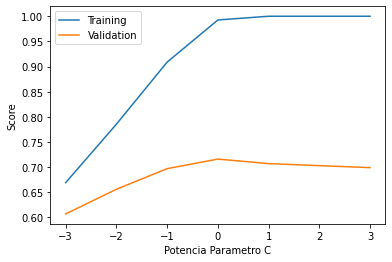

In [10]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)

    return model, train_acc, test_acc
Cs = [0.001, 0.01, 0.1 , 1 , 10, 100, 1000]
Csp=[-3,-2,-1,0,1,2,3]

train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param=i)
    train_l.append(train_acc)
    test_l.append(test_acc)
    
    
plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()


Se puede observar que tanto para los datos de training como los de validaci√≥n, teniendo un parametro C=1 la probabilidad deja de variar notoriamente, vale decir, empieza a converger a un valor. Esto indica que el valor esperado de C seria 1. Se observa ademas que los scores tienden a 100% y a un valor cercano al 70% para training y validation respectivamente.

g) Entrene una M√°quina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gr√°fico que muestre la variaci√≥n de ambos errores respecto al par√°metro de regularizaci√≥n ùê∂ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los par√°metros en este modelo.

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel,probability=False):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel, probability=probability) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"linear")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)
plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()


Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1 Kernel=  linear
Param C=  10 Kernel=  linear
Param C=  100 Kernel=  linear
Param C=  1000 Kernel=  linear
[0.5027407987470635, 0.7443226311667972, 0.9537979639780736, 0.9988253719655442, 1.0, 1.0, 1.0]


Al utilizar "linear" de kernel, se observa que el parametro C empieza a estancarse en 0,1 a diferencia del anterior modelo. Adem√°s, se observa el mismo comportamiento para ambos scores, dejando al training tendiendo a 100%, mientras que para validation tendiendo bajo el 70%.

In [12]:
train_l=[]
test_l=[]

for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"poly")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Score")
plt.legend()

Param C=  0.001 Kernel=  poly
Param C=  0.01 Kernel=  poly
Param C=  0.1 Kernel=  poly
Param C=  1 Kernel=  poly
Param C=  10 Kernel=  poly
Param C=  100 Kernel=  poly
Param C=  1000 Kernel=  poly
[0.5027407987470635, 0.5027407987470635, 0.5877055599060298, 0.9937353171495693, 0.9984338292873923, 0.9996084573218481, 1.0]


Se observa que para kernel polinomial el parametro C esperado es 1 y que la estabilizaci√≥n es similar a los casos anteriores, lo que cambia notoriamente es como afecta en valor de C para potencias mas bajas y como el score de validaci√≥n varia de forma mas inestable, bajando para potencias altas de C.

Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  100 Kernel=  rbf
Param C=  1000 Kernel=  rbf
[0.5027407987470635, 0.5027407987470635, 0.5101801096319499, 0.9870790916209867, 1.0, 1.0, 1.0]


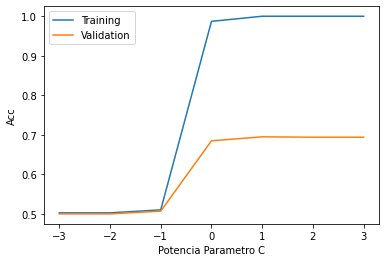

In [13]:
train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, i,"rbf")
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Acc")
plt.legend()

Para kernel rbf(radial basis function) se observa que el valor esperado para C es 10, y que su comportamiento para valores mas altos de C obtiene scores iguales consistentemente, mientras que para valores con potencias muy bajas para C el aprendizaje no se logra apropiadamente.

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Var√≠e el par√°metro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este par√°metro.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
#Ks = np.arange(1, features_train.shape[1], 20)

Ks=(1,2,4,8,16,32,64,128,256,512,1024)
print(Ks)

train_l=[]
test_l=[]
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Ks,train_l, label='Training')
plt.plot(Ks,test_l, label='Validation')
plt.xlabel("Parametro K")
plt.ylabel("Acc")
plt.legend()

(1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024)
Param K=  1
Param K=  2
Param K=  4
Param K=  8
Param K=  16
Param K=  32
Param K=  64
Param K=  128
Param K=  256
Param K=  512
Param K=  1024
[1.0, 0.8931088488645262, 0.7533281127642913, 0.7388410336726703, 0.6511354737666406, 0.6225528582615505, 0.5974941268598277, 0.5595144870790916, 0.6448707909162099, 0.5293657008613939, 0.5066562255285826]


Se observa que, mientras mas K se consideran, peor es el entrenamiento, podria considerarse un valor en torno a K=256 como buen valor, dado que con pocos K naturalmente el score sera alto en training pero estara sobre ajustado, mientras que en torno a 256 se denota un aumento en el score.

> i) Entrene un Arbol de Decisi√≥n para resolver el problema. Var√≠e los par√°metros de *max depth* y *min samples split* de manera separada, constuyendo gr√°ficos de error respecto a estos par√°metros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selecci√≥n de estos dos par√°metros.


[0.514487079091621, 0.8112764291307752, 0.8707909162098669, 0.8970242756460454, 0.9013312451057165, 0.9119028974158183, 0.8974158183241974, 0.90407204385278, 0.9075959279561472, 0.8981989036805011, 0.90407204385278, 0.9028974158183242, 0.9048551292090838, 0.898981989036805, 0.9056382145653876, 0.9075959279561472, 0.894283476898982, 0.9115113547376664, 0.898590446358653, 0.9095536413469069, 0.9044635865309318, 0.9001566170712608, 0.90407204385278, 0.9075959279561472, 0.9001566170712608, 0.9032889584964762, 0.9103367267032106, 0.9052466718872357, 0.8974158183241974, 0.9064212999216915, 0.9036805011746281, 0.9122944400939702, 0.9032889584964762, 0.9107282693813625, 0.9072043852779953, 0.9158183241973376, 0.9083790133124511, 0.9126859827721222, 0.8923257635082223, 0.9017227877838685, 0.9025058731401723, 0.9095536413469069, 0.9032889584964762, 0.90407204385278, 0.898981989036805, 0.898590446358653, 0.9068128425998434, 0.9111198120595145, 0.9064212999216915, 0.9028974158183242, 0.90368050117

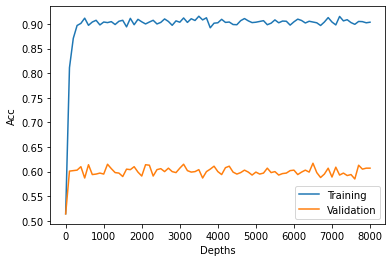

In [15]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 100 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 100 ) #choose steps

train_l=[]
test_l=[]
for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, i, 50)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Depths,train_l, label='Training')
plt.plot(Depths,test_l, label='Validation')
plt.xlabel("Depths")
plt.ylabel("Acc")
plt.legend()



Se puede observar que al aumentar la profundidad maxima del arbol, este sigue obteniendo scores consistentes basandose en samples constantes.

In [16]:
train_l=[]
test_l=[]
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, 50, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(SamplesS,train_l, label='Training')
plt.plot(SamplesS,test_l, label='Validation')
plt.xlabel("SamplesS")
plt.ylabel("Acc")
plt.legend()


[0.764682850430697, 0.7083007047768207, 0.706342991386061, 0.6871574001566171, 0.6664056382145653, 0.663664839467502, 0.6664056382145653, 0.6664056382145653, 0.6648394675019577, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6664056382145653, 0.6613155833985904, 0.639389193422083, 0.6288175411119812, 0.59592795614722, 0.5787000783085356, 0.5708692247454973, 0.5708692247454973, 0.5708692247454973, 0.5708692247454973, 0.5422866092404072, 0.5293657008613939, 0.514487079091621]


Cuando varian las cantidad de samples a una profundidad maxima constante, el entrenamiento pierde score, es producto de que a mayor sample se produce una peor diferenciaci√≥n entre los datos.



> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se se√±ala a continuaci√≥n (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tama√±o de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la funci√≥n de p√©rdida binaria de clasificaci√≥n. La arquitectura de la red contiene una capa de salida con una √∫nica neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con n√∫mero de neuronas $N_h$ y la capa de entrada impl√≠cita para $x$. Var√≠e el par√°metro que corresponde al n√∫mero de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gr√°fico de error con respecto al par√°metro. Comente.

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,6)]
print (N_h)
train_l=[]
test_l=[]
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(N_h,train_l, label='Training')
plt.plot(N_h,test_l, label='Validation')
plt.xlabel("N_h")
plt.ylabel("Acc")
plt.legend()


Using TensorFlow backend.


[2, 4, 8, 16, 32]
Neuron hidden =  2





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
[0.6914643695696127, 0.7079091623320464, 0.6656225527649104, 0.6969459673904682, 0.7451057163830744]


Se puede observar que al aumentar la cantidad de neuronas sobre la misma capa oculta, el modelo no mejora su score. Para tener un punto de referencia se modela el mismo problema utilizando "relu" en vez de "sigmoid" en la capa oculta.

In [18]:
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,6)]
print (N_h)
train_l=[]
test_l=[]
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, i)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(N_h,train_l, label='Training')
plt.plot(N_h,test_l, label='Validation')
plt.xlabel("N_h")
plt.ylabel("Acc")
plt.legend()

[2, 4, 8, 16, 32]
Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
[0.9236491778537269, 0.8688332029591339, 0.8872357087855985, 0.8970242757393965, 0.8731401720920763]


Utilizando distinto kernel se obtiene mucho mejor resultado con ANN, esto puede ser principalmente por la naturaleza del problema.


---




k) Ahora eval√∫e sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la m√©trica de desempe√±o en el conjunto de validaci√≥n. Comente sobre la calidad obtenida en el problema trabajado ¬øEs un buen valor? ¬øCu√°l podr√≠a ser un valor de referencia?

Se selecciona SVM con rbf parametro C=10 ya que es el resultado sobre la validaci√≥n con mejor score.

In [19]:
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
print (test_acc)

Param C=  10 Kernel=  rbf
0.7025886325267304


Es un buen valor, dado que el aprendizaje obtuvo un score mejor a obtener una predicci√≥n de forma mas arbitatria (como tirar una moneda). Un buen punto de referencia para esto fue el resultado de score en la validaci√≥n del modelo.

l) Para comparar sus resultados utilice el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner) [6], el cual entrega una score de predicci√≥n a nivel l√©xico (de palabras que com√∫nmente se asocian a una orientiaci√≥n positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [20]:
!pip install vaderSentiment

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 133kB 2.8MB/s 


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

Comparado con lo obtenido con Vader se obtuvo un resultado mejor por un 7% aproximadamente, lo cual es una mejora considerable sobre el metodo de predicci√≥n a nivel l√©xico.

m) Bajo la idea del modelo VADER realice un an√°lisis de qu√© palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta secci√≥n realizan una predicci√≥n probabilista, utilice uno de √©stos para verificar lo solicitado. Sobre la representaci√≥n TF genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicci√≥n les genera su modelo a esas palabras. Muestre las palabras m√°s negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [22]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

print(np.argmax(word_scores,axis=0))


[ 565 3333]


In [23]:
print(vocab[565])
print(vocab[3333])

bad
heart


Se puede observar que la palabra mas negativa fue "bad" (lo cual hace sentido), mientras que la mas positiva fue "heart" lo cual en el contexto de una critica positiva tiene sentido aunque hayan algunas palabras que uno esperase ser mas positivas que probablemente no fueron tan dominantes en el entrenamiento.


>n) Intente mejorar los resultados de otra manera. Var√≠e el pre-procesamiento realizado a los datos en c), por ejemplo eliminar s√≠mbolos, n√∫meros o aplicar la t√©cnica de stemmming [7] en lugar de lemmatization para llevar a su tronco l√©xico.

In [0]:
from nltk.stem.porter import PorterStemmer

def base_word_stemmer(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor_stemmer(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word_stemmer(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor_stemmer(text) for text in df_train_text]
texts_val = [word_extractor_stemmer(text) for text in df_val_text]
texts_test = [word_extractor_stemmer(text) for text in df_test_text]

vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)



In [25]:
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
print (test_acc)

Param C=  10 Kernel=  rbf
0.7194710185706247


Usando Stemming se obtuvo, utilizando nuevamente SVM con C=10 y rbf, un resultado levemente mejor sobre los datos de test.

>o) Var√≠e la representaci√≥n utilizada actualmente por alguna otra que ayude a mejorar el desempe√±o, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podr√≠a realizar para mejorar el desempe√±o, por ejemplo reducir el vocabulario a las $K$ palabras m√°s frecuentes, eliminar las palabras menos frecuentes, normalizar la representaci√≥n, utilizar n-gramas, entre otras.

Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  10 Kernel=  rbf
Considerando todas las palabras el score es: 0.7284749577940349


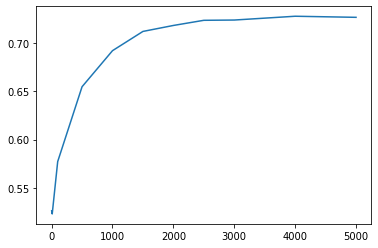

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

P=[1,10,100,100,500,1000,1500,2000,2500,3000,4000,5000,None]
l=[]
for i in P:
  tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=i, norm='l2', use_idf=True, sublinear_tf=False)
  tfidf_model.fit(texts_train)
  features_train=tfidf_model.transform(texts_train)
  features_val =tfidf_model.transform(texts_val)
  features_test =tfidf_model.transform(texts_test)
  model, train_acc, test_acc = do_SVM(features_train,labels_train,features_test,labels_test,10,"rbf", probability=True)
  l.append(test_acc)
plt.plot(P,l)
print("Considerando todas las palabras el score es:",test_acc)


Usando TF-IDF y variando K dentro del rango de valores posibles de cantidad de palabras se puede observar que mientras mas palabras son consideras, mejor es el score obtenido. Se puede considerar tambien que para un valor entre 2000 palabras, el score obtenido no varia mucho en comparaci√≥n a usar todas las palabras lo cual ahorraria capacidad computacional.

Considerando todas las palabras de igual forma se obtiene una mejora frente al anterior metodo utilizado.

> p) Utilice m√©tricas auxiliares para entender en qu√© falla su mejor modelo obtenido hasta el momento. ¬øLa informaci√≥n entregada indica c√≥mo se podr√≠a mejorar o cual ser√≠a la causa de la falla?

In [27]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))

score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.73      0.74      0.73      1803
           +       0.73      0.72      0.72      1751

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



Se puede observar que el modelo predice tanto comentarios negativos como positivos con la misma precision pero difieren levemente en el recall lo puede indicar que en el caso de los comentarios positivos se generas mas falsos positivos (puede ser producto del sarcasmo por ejemplo).

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor inter√©s que las otras e interesa reducir m√°s su error. En *sklearn* √©sto puede ser realizado con el par√°metro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces m√°s que detectar los textos positivos. Comente.

In [28]:
classes_weights = {0: 5, 1: 1} #or choose..
def do_SVM_weighted(x,y,xv,yv, param, kernel,weights,probability=False):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel, probability=probability,class_weight=weights) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

model, train_acc, test_acc = do_SVM_weighted(features_train,labels_train,features_test,labels_test,10,"rbf",classes_weights, probability=True)

score_the_model(model, features_test, labels_test)

Param C=  10 Kernel=  rbf
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.73      0.74      0.73      1803
           +       0.73      0.72      0.72      1751

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



Se puede observar que cambiando los pesos no hubo ningun cambio en las precisiones o en el recall de cada caso.

> r) Visualice la clasificaci√≥n que realiza su mejor modelo sobre algunos textos de pruebas ¬øQu√© entega mas informaci√≥n, una predicci√≥n categ√≥rica o una continua? ¬øCu√°l podr√≠a ser el beneficio de una o de otra? Comente

In [29]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.28646381 0.71353619]
Raw text:  skillful as he is , mr . shyamalan is undone by his pretensions .

True sent:  0.0 -- Pred sent:  [0.73700963 0.26299037]
Raw text:  where tom green stages his gags as assaults on america's knee-jerk moral sanctimony , jackass lacks aspirations of social upheaval .

True sent:  0.0 -- Pred sent:  [0.78711074 0.21288926]
Raw text:  brainy , artistic and muted , almost to the point of suffocation .

True sent:  0.0 -- Pred sent:  [0.70384794 0.29615206]
Raw text:  a culture clash comedy only half as clever as it thinks it is .

True sent:  1.0 -- Pred sent:  [0.22917973 0.77082027]
Raw text:  a pleasant enough movie , held together by skilled ensemble actors .

True sent:  1.0 -- Pred sent:  [0.20355157 0.79644843]
Raw text:  if you can keep your eyes open amid all the blood and gore , you'll see del toro has brought unexpected gravity to blade ii .

True sent:  0.0 -- Pred sent:  [0.51446955 0.48553045]
Raw text:  isn't a

Una predicci√≥n continua entrega mas informaci√≥n que una categorica, ya que se puede observar con que tanta certeza se obtuvo cada respuesta y posiblemente notar facilmente donde se producen los falsos negativos. Por otra parte una predicci√≥n categorica es mucho mas facil de interpretar pero mucho mas complicado entender c√≥mo es que el modelo se equivoca.


> s) Comente sobre el desempe√±o obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¬øD√≥nde pareciera estar la mejora? ¬øEn la variaci√≥n de los modelos y sus par√°metros o en la modificaci√≥n de la representaci√≥n? ¬øCu√°l modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempe√±o, tiempo de ejecuci√≥n comodidad en las decisiones involucradas, etc.

Aparentemente el mejor manejo de la representaci√≥n de los datos permite obtener mejores resultados. Variando los modelos se observo que los que se ajustaban al problema tend√≠an a obtener scores similares, mientras que los que no se ajustaban de buena manera como KNN simplemente no entrenaban apropiadamente.

En el caso de ANN el modelo tampoco logro ajustarse apropiadamente, pero utilizando un distinto kernel si lo hizo, esto producto de la naturaleza del problema. 

SVM fue el modelo mas facil de usar e interpretar, dado que solo modificando el kernel podiamos observar mejoras o perdidas en los scores y resulta menos ambiguo de entender (almenos para nosotros) que una red neuronal, la cual tambien era modificable con los kernels de las capas internar pero habian muchos mas factores a considerar, como el kernel de activaci√≥n en la capa de salida, la cantidad de capaz o el tama√±o de los epochs.


<a id="segundo"></a>

## 2. Problema de M√∫ltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una √∫nica posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definici√≥n del *ground truth* en algunos casos puede resultar bastante dif√≠cil de definir o bastante costoso, por ejemplo en problemas m√©dicos donde se deben realizar invasivos ex√°menes para conocer la "verdad absoluta". Como alternativa se pueden recolectar m√∫ltiples anotaciones desde personas inexpertas en el √°rea para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajar√° en el caso en que contamos con m√∫ltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a trav√©s de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicci√≥n trabajado ser√° el mismo de la actividad anterior, el an√°lisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la p√°gina del autor.

In [0]:
import pandas as pd
df = pd.read_csv("mturk_answers.csv") 

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendr√°n m√∫ltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entreg√≥ una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquet√≥/anot√≥ el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotaci√≥n que entreg√≥ la persona


> El objetivo de la actividad ser√° el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las m√∫ltiples anotaciones de las personas

### Importante
* Deber√° crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* est√°n **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La m√©trica de evaluaci√≥n ser√° el *accuracy score*


#### Sugerencias
Para representar los textos, a diferencia de lo visto en la secci√≥n 1, se puede utilizar lo que son la representaci√≥n vectorial de palabras (*word vectors*), a trav√©s de modelos especializados entrenados para aprender una representaci√≥n en que palabras similares est√©n cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versi√≥n entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```


In [31]:
df

WorkerId  Input.id  ... Input.true_sent Answer.sent
0      A2HD5XMM48KKJW      4518  ...             pos         pos
1      A2HD5XMM48KKJW     10415  ...             neg         neg
2      A2HD5XMM48KKJW      7098  ...             neg         pos
3      A2HD5XMM48KKJW      4396  ...             pos         neg
4      A2HD5XMM48KKJW      2812  ...             pos         pos
...               ...       ...  ...             ...         ...
27741   A4F3BK6J0PCVH      7144  ...             neg         neg
27742   A4F3BK6J0PCVH      8293  ...             neg         neg
27743   A4F3BK6J0PCVH      2929  ...             pos         pos
27744   A4F3BK6J0PCVH      6902  ...             neg         neg
27745   A4F3BK6J0PCVH      1369  ...             pos         pos

[27746 rows x 6 columns]

Mostramos el dataset y logramos diferenciar cada atributo de este. Lo que se buscar√° hacer sera convertir Answer.sent e Input.true_sent a numeros enteros. Para Answer.sent se sacar√° el promedio de las votaciones hechas por las personas sobre cada oraci√≥n. Esto, en conjunto a Input.true_sent (ground truth) y Input.stemmed_sent seran los datos con los que trabajaremos, siendo los promedios de los Answer_sent la etiqueta para cada Input.stemmed_sent.

Con esto trabajaremos de forma similar a lo realizado en la parte 1 de la tarea. Dado que la naturaleza del problema es similar (muchas caracteristicas para cada dato) utilizaremos el metodo predictor con mejor resultado anteriormente el cual fue SVM con rbf.

Utilizaremos Input.id para identificar las sentencias de forma facil.

In [32]:
palabras = dict()

#j=rows
for i, j in df.iterrows():
    if j["Input.id"] not in palabras.keys():
        if j["Input.true_sent"]=="pos":
            palabras[j["Input.id"]] = (j["Input.stemmed_sent"], list(), 1) 
        else:
            palabras[j["Input.id"]] = (j["Input.stemmed_sent"], list(), 0) 


    if j["Answer.sent"]=="pos":
        palabras[j["Input.id"]][1].append(1)
    else:
        palabras[j["Input.id"]][1].append(0)

#print(palabras)
from numpy import median
labels= list()
ground_truth = list()
texto = list()
for _,(palabra, label, ground) in palabras.items():
    prom = median(label) 
    texto.append(palabra)
    labels.append(round(prom,0))
    ground_truth.append(ground)
#print(labels)
print("Forma de las labels Train:",len(labels))

Forma de las labels Train: 4999


Separamos entre conjuntos de prueba y validaci√≥n considerando la proporci√≥n del 30% para validaci√≥n y vectorizamos los datos utilizando CountVectorizer.



In [0]:
from sklearn.model_selection import train_test_split
train_text, val_text, labels_train, labels_val  = train_test_split(texto, labels, test_size= 1500, random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(train_text)
vectorizer.transform(train_text)

vectorizer.fit(train_text)
features_train = vectorizer.transform(train_text)
features_val = vectorizer.transform(val_text)




Utilizamos SVM con rbf y probamos con distintos valores C para poder determinar uno.

In [34]:
train_l=[]
test_l=[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,i,"rbf", probability=True)
    train_l.append(train_acc)
    test_l.append(test_acc)
print (train_l)

plt.plot(Csp,train_l, label='Training')
plt.plot(Csp,test_l, label='Validation')
plt.xlabel("Potencia Parametro C")
plt.ylabel("Acc")
plt.legend()



Param C=  0.001 Kernel=  rbf
Param C=  0.01 Kernel=  rbf
Param C=  0.1 Kernel=  rbf
Param C=  1 Kernel=  rbf
Param C=  10 Kernel=  rbf
Param C=  100 Kernel=  rbf
Param C=  1000 Kernel=  rbf
[0.5141468991140326, 0.5141468991140326, 0.5147184909974278, 0.9782795084309803, 1.0, 1.0, 1.0]


Se observa que en C=1 el score de validaci√≥n empieza a comportarse de forma constante. Con esto se decide entrenar con C=1 y comparar los valores respecto a las etiquetas reales.

In [43]:
a, b, labels_test, c  = train_test_split(texto, ground_truth, test_size= 1500, random_state=0)
model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val,1,"rbf", probability=True)
predict=model.predict(features_train)



Param C=  1 Kernel=  rbf


In [44]:
print("Score de etiquetas entrenadas vs etiquetas reales",accuracy_score(labels_test,predict))

Score de etiquetas entrenadas vs etiquetas reales 0.8808230923120892


Se obtiene como resultado una accuracy del 88% aproximadamente, lo cual es un resultado mas alto de lo que esperabamos, haciendo contraste con lo hecho en la parte 1.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.